## ML Estimation for a Discrete Linear Observation Model

In this section, it is assumed that the parameters $ \alpha_l, l = 1, \dots, L $, are to be estimated from the received samples $ y_i, i = 1, \dots, k $, by forming the weighted linear combination given by  

$$
y_i = \sum_{l=1}^L h_{il} \alpha_l + n_i, \quad i = 1, \dots, k 
$$

where $ h_{il}, i = 1, \dots, k $ and $ l = 1, \dots, L $, are real coefficients and $ n_i $ are samples of zero-mean Gaussian noise. 

The noise is, in general, nonwhite with a covariance matrix $ R_n = \mathbb{E}[\vec{n}\vec{n}^T] $, where $ \vec{n} = [n_1, \dots, n_k]^T $. 

In matrix notation, Eq. (12.1) can be expressed as  

$$
\vec{y} = H \vec{\alpha} + \vec{n} 
$$

where  

$$
\begin{align*}
H &= 
\begin{bmatrix}
h_{11} & \cdots & h_{1L} \\
\vdots & \ddots & \vdots \\
h_{k1} & \cdots & h_{kL}
\end{bmatrix} \\
\vec{y} &= [y_1, \dots, y_k]^T, \\
\vec{\alpha} &= [\alpha_1, \dots, \alpha_L]^T 
\end{align*}
$$

In this formulation, the matrix $ H $ is referred to as the **channel matrix**. 

This representation is a generalized version of the amplitude estimation problem treated in Section 11.4, although as Example 12.1 indicates, it has a much larger application.

### Example

This simple navigation example [B2, Ex. 12.1] indicates the practicality of the above signal model. 

Assume that a navigation system exists with four reference stations located at known Cartesian coordinates $ X_i, Y_i, Z_i $, $ i = 1, \dots, 4 $. 

These stations are synchronized in time, and each one transmits a navigation signal at a known time $ t_i $, $ i = 1, \dots, 4 $.  

A vehicle has an initial estimate of its location at $ X_0, Y_0, Z_0 $; however, its actual location is at $ X_0 + \Delta x, Y_0 + \Delta y, Z_0 + \Delta z $. 

Furthermore, it has a clock error of $ \Delta t $. Thus, the vehicle's measurement of arrival time of the navigation signal from reference $ i $ is  

$$
y_i = \frac{1}{c} \sqrt{
    \begin{aligned}
    &(X_i - X_0 - \Delta x)^2 \\ 
    + &(Y_i - Y_0 - \Delta y)^2 \\
    + &(Z_i - Z_0 - \Delta z)^2
    \end{aligned}
    } + t_i + \Delta t + n_i 
$$

where $ c $ is the speed of light. 

If we expand this equation in a Taylor series around $ \Delta x = 0, \Delta y = 0, \Delta z = 0 $, and if we let  

$$
d_i = \sqrt{(X_i - X_0)^2 + (Y_i - Y_0)^2 + (Z_i - Z_0)^2} 
$$

then  

$$
\begin{align*}
y_i &= \frac{d_i}{c} - \frac{(X_i - X_0)}{d_i c} \Delta x - \frac{(Y_i - Y_0)}{d_i c} \Delta y - \frac{(Z_i - Z_0)}{d_i c} \Delta z \\
&+ t_i + \Delta t + n_i 
\end{align*}
$$

where we have kept just the linear terms in the Taylor series. 

Subtracting the known constants $ d_i / c $ and $ t_i $ from both sides of this equation, we arrive at a new measurement, which can be interpreted as an error-measurement term:  

$$
\begin{align*}
y_{e_i} &= y_i - \frac{d_i}{c} - t_i \\
&= -\frac{(X_i - X_0)}{d_i c} \Delta x - \frac{(Y_i - Y_0)}{d_i c} \Delta y - \frac{(Z_i - Z_0)}{d_i c} \Delta z + \Delta t + n_i 
\end{align*}
$$

Generalizing to all four error-measurement terms ($i = 1, 2, 3, 4$), we can write  

$$
\vec{y} = H \vec{\alpha} + \vec{n} 
$$

where  

$$
\vec{y} = [y_{e_1}, \dots, y_{e_4}]^T 
$$

$$
\vec{\alpha} = [\Delta x, \Delta y, \Delta z, \Delta t]^T 
$$

and  

$$
H =
\begin{bmatrix}
-\frac{X_1 - X_0}{d_1 c} & -\frac{Y_1 - Y_0}{d_1 c} & -\frac{Z_1 - Z_0}{d_1 c} & 1 \\
-\frac{X_2 - X_0}{d_2 c} & -\frac{Y_2 - Y_0}{d_2 c} & -\frac{Z_2 - Z_0}{d_2 c} & 1 \\
-\frac{X_3 - X_0}{d_3 c} & -\frac{Y_3 - Y_0}{d_3 c} & -\frac{Z_3 - Z_0}{d_3 c} & 1 \\
-\frac{X_4 - X_0}{d_4 c} & -\frac{Y_4 - Y_0}{d_4 c} & -\frac{Z_4 - Z_0}{d_4 c} & 1
\end{bmatrix} 
$$
  

This example is a much-simplified form of the navigation approach used by the Global Positioning System (GPS) satellite navigation system. 

In the GPS system, the reference stations are orbiting satellites; because the satellites are moving and the vehicles are potentially moving, the GPS system also solves for velocity terms as well as position terms.  

In addition, the GPS solutions use a circular coordinate system rather than the Cartesian coordinate system of this example. 

Finally, most GPS receivers use forms of the Kalman filter rather than the linear estimation procedure of this example.

### ML Estimation

Returning now to the general theory, we seek an ML estimate from the conditional pdf $ p(\vec{y}|\vec{\alpha}) $ given by  

$$
p(\vec{y}|\vec{\alpha}) = \frac{1}{[(2\pi)^k \det(R_n)]^{1/2}} \exp\left(-\frac{1}{2} [\vec{y} - H\vec{\alpha}]^T R_n^{-1} [\vec{y} - H\vec{\alpha}]\right) 
$$

The derivative of the log-likelihood is computed from  

$$
\frac{\partial}{\partial \alpha_l} \ln p(\vec{y}|\vec{\alpha}), \quad l = 1, \dots, L 
$$

or in vector notation  

$$
\begin{align*}
\frac{\partial}{\partial \vec{\alpha}} \ln p(\vec{y}|\vec{\alpha}) 
&= \frac{\partial}{\partial \vec{\alpha}} \left[-\frac{1}{2} (\vec{y} - H\vec{\alpha})^T R_n^{-1} (\vec{y} - H\vec{\alpha}) - \ln [(2\pi)^{k/2} (\det R_n)^{1/2}]\right] \\
&= -\frac{1}{2} \frac{\partial}{\partial \vec{\alpha}} \left[\vec{y}^T R_n^{-1} \vec{y} - (H\vec{\alpha})^T R_n^{-1} \vec{y} - \vec{y}^T R_n^{-1} H\vec{\alpha} + (H\vec{\alpha})^T R_n^{-1} H\vec{\alpha}\right] \\
&= -\frac{1}{2} \frac{\partial}{\partial \vec{\alpha}} \left[-\vec{y}^T R_n^{-1} H \vec{\alpha} - \vec{\alpha}^T H^T R_n^{-1} \vec{y} + \vec{\alpha}^T H^T R_n^{-1} H \vec{\alpha}\right] 
\end{align*}
$$

To continue the evaluation of this equation, the following matrix identities are needed:  

$$
\begin{align*}
\frac{\partial}{\partial \vec{v}} [\vec{w}^T P \vec{v}] &= P^T \vec{w}  \\
\frac{\partial}{\partial \vec{v}} [\vec{v}^T P \vec{w}] &= P \vec{w}  \\
\frac{\partial}{\partial \vec{v}} [\vec{v}^T P \vec{v}] &= [P + P^T] \vec{v} 
\end{align*}
$$

where 
* $ P $ is an arbitrary $ k \times k $ element matrix 
* $ \vec{w} $ and $ \vec{v} $ are $ k $-element real column vectors.  

With these identities, the derivative can be written as  

$$
\begin{align*}
\frac{\partial}{\partial \vec{\alpha}} \ln p(\vec{y}|\vec{\alpha}) 
= -\frac{1}{2} \bigg[&-(R_n^{-1} H)^T \vec{y} - H^T R_n^{-1} \vec{y} \\
&+ \left[H^T R_n^{-1} H + (H^T R_n^{-1} H)^T \right] \vec{\alpha} \bigg] 
\end{align*}
$$

Since $ (R_n^{-1})^T = R_n^{-1} $, this equation becomes  

$$
\frac{\partial}{\partial \vec{\alpha}} \ln p(\vec{y}|\vec{\alpha}) = H^T R_n^{-1} \vec{y} - H^T R_n^{-1} H \vec{\alpha} 
$$

Setting the foregoing equation to zero and solving yields  

$$\boxed{
\vec{\hat{\alpha}}_{ML} = (H^T R_n^{-1} H)^{-1} H^T R_n^{-1} \vec{y} 
}
$$

where $ \vec{\hat{\alpha}}_{ML} $ is an ML estimate of $ \vec{\alpha} $.

### Unbiased Estimator

Note that the matrix $ H^T R_n^{-1} H $ must be invertible. 

The ML estimate is unbiased since $ \mathbb{E}[\vec{y}] = H \vec{\alpha} $, and  

$$
\begin{align*}
\mathbb{E} \{\vec{\hat{\alpha}}_{ML} \} 
&= (H^T R_n^{-1} H)^{-1} H^T R_n^{-1} \mathbb{E}[\vec{y}] \\
&= \vec{\alpha} 
\end{align*}
$$

### Error Vector

The error vector $ \vec{\alpha}_e = \vec{\alpha} - \vec{\hat{\alpha}}_{ML} $ is zero mean since the estimate is unbiased. Using Eq. (12.2), the error vector can be reexpressed as  

$$
\begin{align*}
\vec{\alpha}_e 
&= \vec{\alpha} - (H^T R_n^{-1} H)^{-1} H^T R_n^{-1} H \vec{\alpha} - (H^T R_n^{-1} H)^{-1} H^T R_n^{-1} \vec{n} \\
&= -(H^T R_n^{-1} H)^{-1} H^T R_n^{-1} \vec{n} 
\end{align*}
$$

The error covariance matrix $ R_{\vec{\alpha}_e} = \mathbb{E} \{\vec{\alpha}_e \vec{\alpha}_e^T\} $ can now be computed from the preceding equation as  

$$
\begin{align*}
R_{\vec{\alpha}_e} 
&= \mathbb{E} \{(H^T R_n^{-1} H)^{-1} H^T R_n^{-1} \vec{n} \vec{n}^T R_n^{-1} H (H^T R_n^{-1} H)^{-1}\} \\
&= (H^T R_n^{-1} H)^{-1} H^T  R_n^{-1} H (H^T R_n^{-1} H)^{-1} \\
&= (H^T R_n^{-1} H)^{-1} 
\end{align*}
$$

### Cramér-Rao bound

The Cramér-Rao bound is determined for this case by using the elements $ F_{ij} $ from the Fisher information matrix (defined previously) and repeated here for convenience as  

$$
F_{ij} = -\mathbb{E} \left\{ \frac{\partial^2 \ln p(\vec{y}|\vec{\alpha})}{\partial \alpha_i \partial \alpha_j} \right\}, \quad i, j = 1, \dots, L 
$$

Computing the derivative 

$$
\frac{\partial}{\partial \vec{\alpha}} \ln p(\vec{y}|\vec{\alpha}) = H^T R_n^{-1} \vec{y} - H^T R_n^{-1} H \vec{\alpha}
$$

and taking the expectation yields the matrix  

$$
\begin{align*}
F &= -\mathbb{E} \left\{ \frac{\partial}{\partial \vec{\alpha}} \left(H^T R_n^{-1} \vec{y} - H^T R_n^{-1} H \vec{\alpha}\right) \right\}\\
&= \mathbb{E} \left\{ \frac{\partial}{\partial \vec{\alpha}} \left(H^T R_n^{-1} H \vec{\alpha}\right) \right\} 
\end{align*}
$$

Using the identity  

$$
\frac{\partial}{\partial \vec{v}} (P \vec{v}) = P 
$$

where $ P $ and $ \vec{v} $ are defined before as 
* $ P $ is an arbitrary $ k \times k $ element matrix 
* $ \vec{w} $ and $ \vec{v} $ are $ k $-element real column vectors

Thus, this matrix to be written as  

$$
F = H^T R_n^{-1} H 
$$

The Cramér-Rao bound is obtained from the elements of $ G = F^{-1} $, i.e.,  

$$
G = (H^T R_n^{-1} H)^{-1} 
$$

Comparing $R_{\vec{\alpha}_e}$ and $G$, it can be seen that the lower bound is attained, and thus the ML estimate is a minimum-variance estimate.

### Example

In this example [B2, Ex. 12.2], a simple numerical example is provided to demonstrate the computations involved. 

Assume that $ k = 2 $ with $ H $ given by  

$$
H = 
\begin{bmatrix}
2 & 1 \\
-2 & 1
\end{bmatrix}
$$

From 

$$
y_i = \sum_{l=1}^L h_{il} \alpha_l + n_i, \quad i = 1, \dots, k 
$$

the received measurements are then  

$$
y_1 = 2\alpha_1 + \alpha_2 + n_1, \quad y_2 = -2\alpha_1 + \alpha_2 + n_2 
$$

Assume further that the noise is zero mean with a covariance matrix given by  

$$
R_n = 
\begin{bmatrix}
2 & 1 \\
1 & 1
\end{bmatrix} 
$$

implying  

$$
R_n^{-1} = 
\begin{bmatrix}
1 & -1 \\
-1 & 2
\end{bmatrix}
$$


**ML Estimator:**

We have that 

$$
\hat{\alpha}_{ML} = (H^T R_n^{-1} H)^{-1} H^T R_n^{-1} \mathbf{y}
$$

**Theoretical Derivation**

**Compute $ H^T R_n^{-1} $**

First, compute the transpose of $ H $:

$$
H^T = 
\begin{bmatrix}
2 & -2 \\
1 & 1
\end{bmatrix}
$$

Now, compute $ H^T R_n^{-1} $:

$$
\begin{align*}
H^T R_n^{-1} &= 
\begin{bmatrix}
2 & -2 \\
1 & 1
\end{bmatrix}
\begin{bmatrix}
1 & -1 \\
-1 & 2
\end{bmatrix}
\\
&=
\begin{bmatrix}
2 \times 1 + (-2) \times (-1) & 2 \times (-1) + (-2) \times 2 \\
1 \times 1 + 1 \times (-1) & 1 \times (-1) + 1 \times 2
\end{bmatrix}
\\
&=
\begin{bmatrix}
4 & -6 \\
0 & 1
\end{bmatrix}
\end{align*}
$$

**Compute $ H^T R_n^{-1} H $**

Multiply $ H^T R_n^{-1} $ with $ H $:

$$
\begin{align*}
H^T R_n^{-1} H 
&= 
\begin{bmatrix}
4 & -6 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
2 & 1 \\
-2 & 1
\end{bmatrix}
\\
&=
\begin{bmatrix}
4 \times 2 + (-6) \times (-2) & 4 \times 1 + (-6) \times 1 \\
0 \times 2 + 1 \times (-2) & 0 \times 1 + 1 \times 1
\end{bmatrix}
\\
&=
\begin{bmatrix}
20 & -2 \\
-2 & 1
\end{bmatrix}
\end{align*}
$$

**Invert $ H^T R_n^{-1} H $**

Compute the inverse of $ H^T R_n^{-1} H $:

$$
(H^T R_n^{-1} H)^{-1} = \frac{1}{\text{det}}
\begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}
$$

Where:

$$
\text{det} = (20)(1) - (-2)(-2) = 20 - 4 = 16
$$

Thus,

$$
(H^T R_n^{-1} H)^{-1} = \frac{1}{16}
\begin{bmatrix}
1 & 2 \\
2 & 20
\end{bmatrix}
$$

**Derive the ML Estimator**

The ML estimator is given by:

$$
\hat{\alpha}_{ML} = (H^T R_n^{-1} H)^{-1} H^T R_n^{-1} \mathbf{y}
$$

Substituting the computed matrices:

$$
\hat{\alpha}_{ML} = \frac{1}{16}
\begin{bmatrix}
1 & 2 \\
2 & 20
\end{bmatrix}
\begin{bmatrix}
4 & -6 \\
0 & 1
\end{bmatrix}
\mathbf{y}
$$

Perform the matrix multiplication:

$$
\begin{align*}
\frac{1}{16}
&\begin{bmatrix}
1 \times 4 + 2 \times 0 & 1 \times (-6) + 2 \times 1 \\
2 \times 4 + 20 \times 0 & 2 \times (-6) + 20 \times 1
\end{bmatrix}
\\
=
\frac{1}{16}
&\begin{bmatrix}
4 & -4 \\
8 & 8
\end{bmatrix}
\\
=
\frac{1}{4}
&\begin{bmatrix}
1 & -1 \\
2 & 2
\end{bmatrix}
\end{align*}
$$

Thus, the ML estimators for $ \alpha_1 $ and $ \alpha_2 $ are:

$$\boxed{
\begin{align*}
\hat{\alpha}_{ML1} &= \frac{1}{4} y_1 - \frac{1}{4} y_2 \\
\hat{\alpha}_{ML2} &= \frac{1}{2} y_1 + \frac{1}{2} y_2
\end{align*}
}
$$

**Cramér-Rao Bound (CRB)**

The CRB provides a lower bound on the variance of unbiased estimators and is given by the diagonal elements of $ (H^T R_n^{-1} H)^{-1} $:

$$
\text{Var}(\alpha_1) \geq \frac{1}{16} = 0.0625
$$
$$
\text{Var}(\alpha_2) \geq \frac{20}{16} = 1.25
$$


### Simulation

True Parameters:
alpha1 = 1.0, alpha2 = 2.0

Estimated Parameters (Mean ± Std Dev):
alpha1 = 0.9990 ± 0.2553
alpha2 = 1.9945 ± 1.0860

Cramér-Rao Bounds:
Var(alpha1) >= 0.0625
Var(alpha2) >= 1.2500


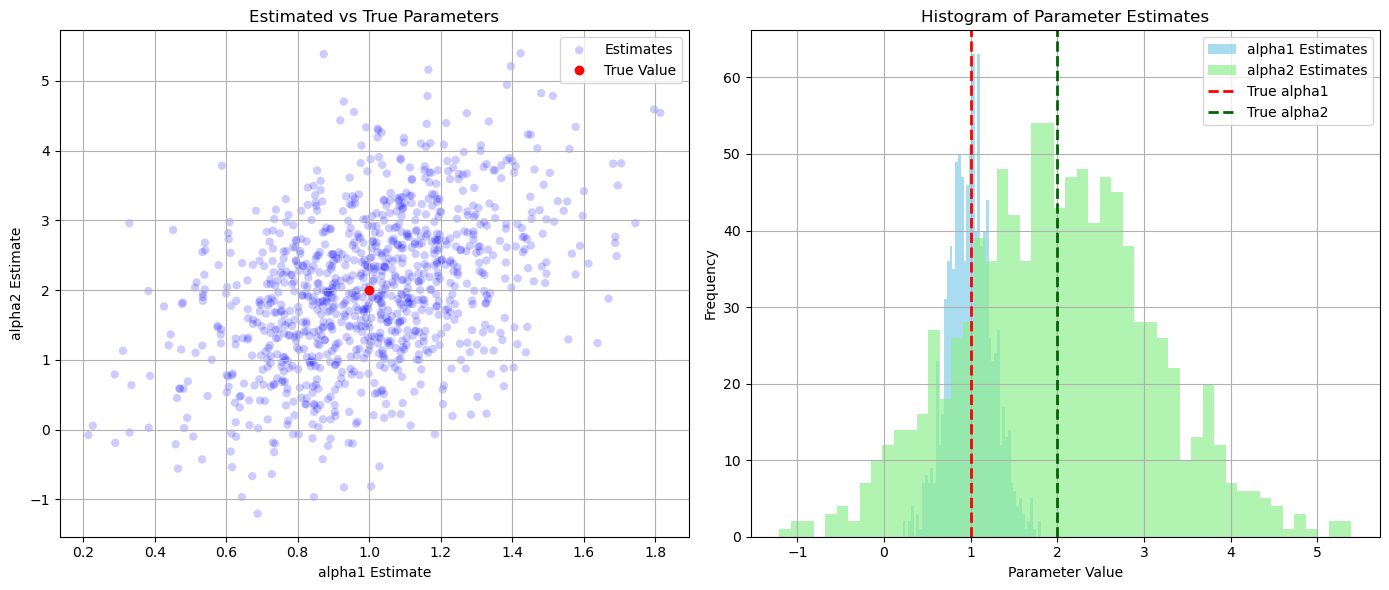

In [33]:
import numpy as np
import matplotlib.pyplot as plt


# Number of simulation runs
num_simulations = 1000

# Define true parameters
alpha_true = np.array([1.0, 2.0])  # Example values for alpha1 and alpha2

# Define H matrix
H = np.array([
    [2, 1],
    [-2, 1]
])

# Define noise covariance matrix R_n and its inverse R_n_inv
R_n_inv = np.array([
    [1, -1],
    [-1, 2]
])

# Compute R_n by inverting R_n_inv
R_n = np.linalg.inv(R_n_inv)

# Compute H^T R_n^{-1} H
Ht_Rn_inv = H.T @ R_n_inv
Ht_Rn_H = Ht_Rn_inv @ H

# Compute the inverse of H^T R_n^{-1} H
Ht_Rn_H_inv = np.linalg.inv(Ht_Rn_H)

# Compute the ML estimator matrix
ML_estimator = Ht_Rn_H_inv @ Ht_Rn_inv  # This results in a 2x2 matrix

# Verify ML_estimator matches theoretical expressions
# Expected:
# ML_estimator = [[1/4, -1/4],
#                [1/2,  1/2]]

# Due to floating point arithmetic, allow for small deviations
expected_ML_estimator = np.array([
    [0.25, -0.25],
    [0.5, 0.5]
])

assert np.allclose(ML_estimator, expected_ML_estimator), "ML Estimator does not match expected values."

# Initialize arrays to store estimates
alpha_estimates = np.zeros((num_simulations, 2))

# Perform simulations
for i in range(num_simulations):
    # Generate noise sample from multivariate normal distribution
    noise = np.random.multivariate_normal(mean=np.zeros(2), cov=R_n)
    
    # Generate measurement y
    y = H @ alpha_true + noise
    
    # Compute ML estimates
    alpha_ml = ML_estimator @ y
    
    # Store estimates
    alpha_estimates[i] = alpha_ml

# Compute statistics
alpha_mean = np.mean(alpha_estimates, axis=0)
alpha_std = np.std(alpha_estimates, axis=0)
cramer_rao_bounds = np.diag(Ht_Rn_H_inv)  # Extract variances from the inverse matrix

# Display results
print("True Parameters:")
print(f"alpha1 = {alpha_true[0]}, alpha2 = {alpha_true[1]}\n")

print("Estimated Parameters (Mean ± Std Dev):")
print(f"alpha1 = {alpha_mean[0]:.4f} ± {alpha_std[0]:.4f}")
print(f"alpha2 = {alpha_mean[1]:.4f} ± {alpha_std[1]:.4f}\n")

print("Cramér-Rao Bounds:")
print(f"Var(alpha1) >= {cramer_rao_bounds[0]:.4f}")
print(f"Var(alpha2) >= {cramer_rao_bounds[1]:.4f}")

# Visualization

# Scatter plot of estimated vs true parameters
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(alpha_estimates[:, 0], alpha_estimates[:, 1], alpha=0.2, label='Estimates', color='blue', edgecolor='none')
plt.plot(alpha_true[0], alpha_true[1], 'ro', label='True Value')
plt.title('Estimated vs True Parameters')
plt.xlabel('alpha1 Estimate')
plt.ylabel('alpha2 Estimate')
plt.legend()
plt.grid(True)

# Histograms of estimates
plt.subplot(1, 2, 2)
plt.hist(alpha_estimates[:, 0], bins=50, alpha=0.7, label='alpha1 Estimates', color='skyblue')
plt.hist(alpha_estimates[:, 1], bins=50, alpha=0.7, label='alpha2 Estimates', color='lightgreen')
plt.axvline(alpha_true[0], color='red', linestyle='dashed', linewidth=2, label='True alpha1')
plt.axvline(alpha_true[1], color='darkgreen', linestyle='dashed', linewidth=2, label='True alpha2')
plt.title('Histogram of Parameter Estimates')
plt.xlabel('Parameter Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


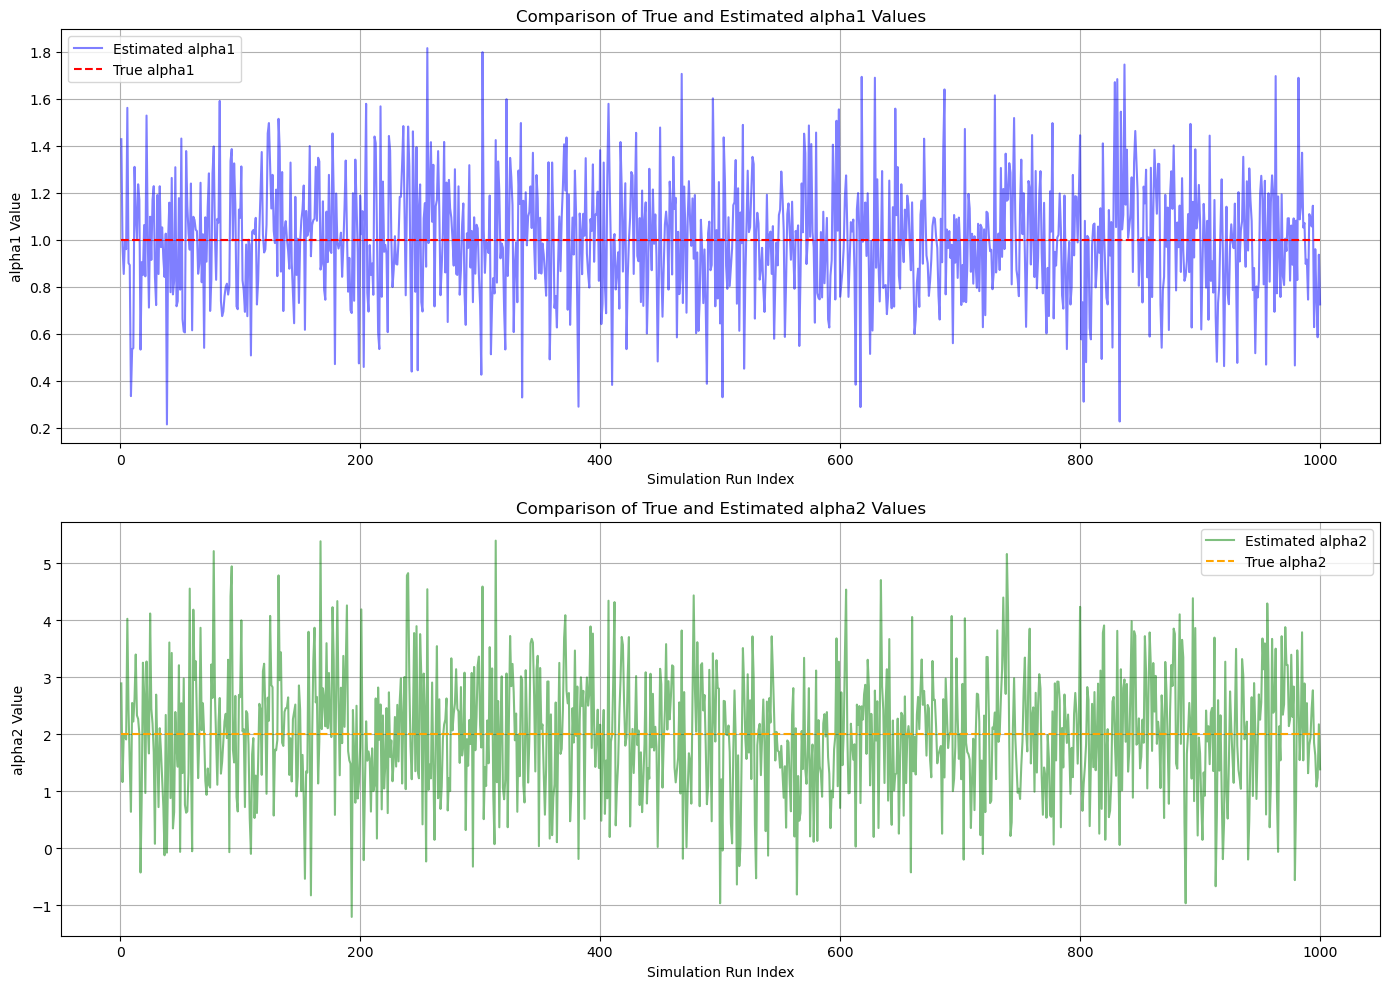

In [34]:
# Visualization

# Create an array of indices
indices = np.arange(1, num_simulations + 1)

# Plot for alpha1
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(indices, alpha_estimates[:, 0], label='Estimated alpha1', color='blue', alpha=0.5)
plt.hlines(alpha_true[0], xmin=1, xmax=num_simulations, colors='red', linestyles='dashed', label='True alpha1')
plt.title('Comparison of True and Estimated alpha1 Values')
plt.xlabel('Simulation Run Index')
plt.ylabel('alpha1 Value')
plt.legend()
plt.grid(True)

# Plot for alpha2
plt.subplot(2, 1, 2)
plt.plot(indices, alpha_estimates[:, 1], label='Estimated alpha2', color='green', alpha=0.5)
plt.hlines(alpha_true[1], xmin=1, xmax=num_simulations, colors='orange', linestyles='dashed', label='True alpha2')
plt.title('Comparison of True and Estimated alpha2 Values')
plt.xlabel('Simulation Run Index')
plt.ylabel('alpha2 Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Random Parameters

True Parameters Distributions:
alpha1 ~ N(1.0, 0.5^2)
alpha2 ~ N(2.0, 1.0^2)

Estimated Parameters (Mean ± Std Dev):
alpha1_est = 1.0016 ± 0.5258
alpha2_est = 2.1145 ± 1.4001

Cramér-Rao Bounds:
Var(alpha1) >= 0.0625
Var(alpha2) >= 1.25



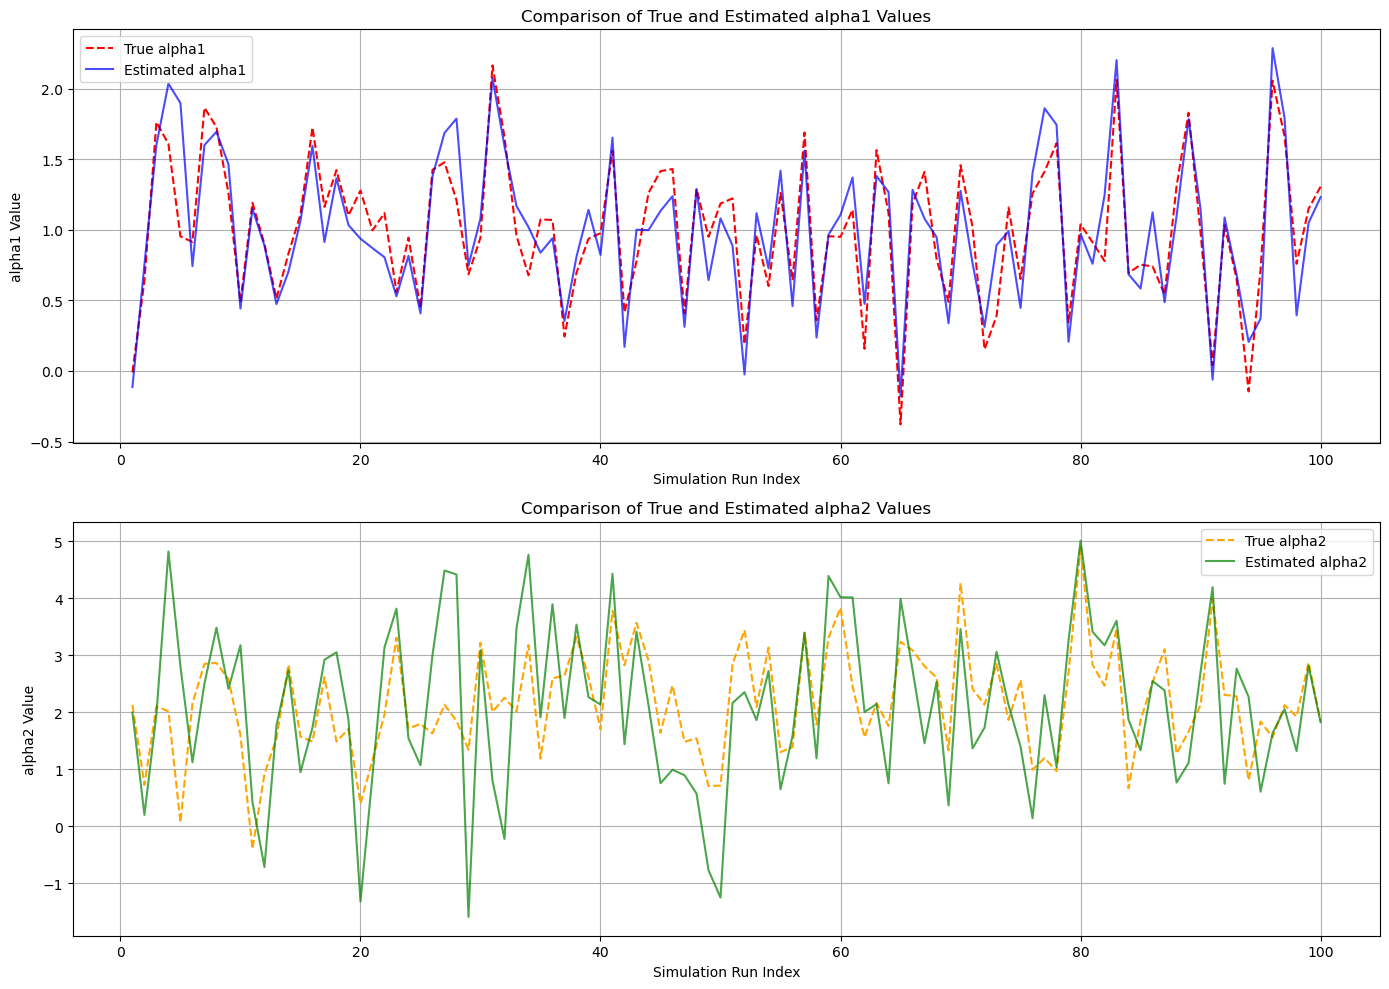

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Number of simulations
num_simulations = 100

# Define true alpha1 and alpha2 distributions
# alpha1: mean=1.0, std=0.5
# alpha2: mean=2.0, std=1.0
mu_a1, sigma_a1 = 1.0, 0.5
mu_a2, sigma_a2 = 2.0, 1.0

# Define H matrix
H = np.array([
    [2, 1],
    [-2, 1]
])

# Define noise covariance matrix R_n and its inverse R_n_inv
R_n_inv = np.array([
    [1, -1],
    [-1, 2]
])

# Compute R_n by inverting R_n_inv
R_n = np.linalg.inv(R_n_inv)

# Define the ML estimator matrix directly
ML_estimator = np.array([
    [0.25, -0.25],
    [0.5, 0.5]
])

# Initialize arrays to store true and estimated parameters
true_alpha1 = np.random.normal(loc=mu_a1, scale=sigma_a1, size=num_simulations)
true_alpha2 = np.random.normal(loc=mu_a2, scale=sigma_a2, size=num_simulations)
alpha_estimates = np.zeros((num_simulations, 2))  # Columns: alpha1_est, alpha2_est

# Perform simulations
for i in range(num_simulations):
    # Current true alpha vector
    alpha_true = np.array([true_alpha1[i], true_alpha2[i]])
    
    # Generate noise sample from multivariate normal distribution
    noise = np.random.multivariate_normal(mean=np.zeros(2), cov=R_n)
    
    # Generate measurement y
    y = H @ alpha_true + noise
    
    # Compute ML estimates
    alpha_ml = ML_estimator @ y
    
    # Store estimates
    alpha_estimates[i] = alpha_ml

# Compute statistics
alpha_est1_mean = np.mean(alpha_estimates[:, 0])
alpha_est1_std = np.std(alpha_estimates[:, 0])

alpha_est2_mean = np.mean(alpha_estimates[:, 1])
alpha_est2_std = np.std(alpha_estimates[:, 1])

# Cramér-Rao Bounds
CRB_alpha1 = 0.0625  # From the diagonal of (H^T Rn^{-1} H)^{-1}
CRB_alpha2 = 1.25     # From the diagonal of (H^T Rn^{-1} H)^{-1}

# Display results
print("True Parameters Distributions:")
print(f"alpha1 ~ N({mu_a1}, {sigma_a1}^2)")
print(f"alpha2 ~ N({mu_a2}, {sigma_a2}^2)\n")

print("Estimated Parameters (Mean ± Std Dev):")
print(f"alpha1_est = {alpha_est1_mean:.4f} ± {alpha_est1_std:.4f}")
print(f"alpha2_est = {alpha_est2_mean:.4f} ± {alpha_est2_std:.4f}\n")

print("Cramér-Rao Bounds:")
print(f"Var(alpha1) >= {CRB_alpha1}")
print(f"Var(alpha2) >= {CRB_alpha2}\n")

# Visualization

# Create an array of indices
indices = np.arange(1, num_simulations + 1)

# Select a subset of indices for clearer plots (e.g., first 1000)
plot_subset = 1000
subset_indices = indices[:plot_subset]
subset_true_a1 = true_alpha1[:plot_subset]
subset_true_a2 = true_alpha2[:plot_subset]
subset_est_a1 = alpha_estimates[:plot_subset, 0]
subset_est_a2 = alpha_estimates[:plot_subset, 1]

# Plot for alpha1
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(subset_indices, subset_true_a1, label='True alpha1', color='red', linestyle='--')
plt.plot(subset_indices, subset_est_a1, label='Estimated alpha1', color='blue', alpha=0.7)
plt.title('Comparison of True and Estimated alpha1 Values')
plt.xlabel('Simulation Run Index')
plt.ylabel('alpha1 Value')
plt.legend()
plt.grid(True)

# Plot for alpha2
plt.subplot(2, 1, 2)
plt.plot(subset_indices, subset_true_a2, label='True alpha2', color='orange', linestyle='--')
plt.plot(subset_indices, subset_est_a2, label='Estimated alpha2', color='green', alpha=0.7)
plt.title('Comparison of True and Estimated alpha2 Values')
plt.xlabel('Simulation Run Index')
plt.ylabel('alpha2 Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
